# Supervised Group Project

## Data Exploration

### Data Types

In [1]:
import pandas as pd
import numpy as np
import re
from IPython.core.display import display, Markdown
pd.set_option('display.max_columns', None)

summary = pd.read_excel('Songs_2025.xlsx', sheet_name='legend')
summary = summary.rename(columns = {'year': 'Variable', 'year.1': 'Description'})

df = pd.read_excel('Songs_2025.xlsx', sheet_name='spotify songs')
summary['Data Type'] = df.dtypes.values[1:]

md_table = summary.to_markdown(index=False)
display(Markdown(md_table))
display(df.head(1))
display(Markdown('---'))

C:\Users\SABIO\AppData\Local\Temp\ipykernel_4640\1906521134.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, Markdown


| Variable          | Description                                                                                                                                                                  | Data Type   |
|:------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:------------|
| track_name        | track name                                                                                                                                                                   | object      |
| track_popularity  | track popularity from 0 to 100                                                                                                                                               | int64       |
| album             | album the track appears on                                                                                                                                                   | object      |
| artist_name       | artist name                                                                                                                                                                  | object      |
| artist_genres     | list of the Genres the artist is associated with                                                                                                                             | object      |
| artist_popularity | artist popularity from 0 to 100, being the maximum                                                                                                                           | int64       |
| danceability      | a value of 0.0 is least danceable and 1.0 is most danceable                                                                                                                  | float64     |
| energy            | a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity, being 1.0 the maximum                                                               | float64     |
| key               | The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C,  1 = Câ™¯/Dâ™­,  2 = D  and so on                                              | float64     |
| loudness          | The overall loudness of a track in decibels (dB)                                                                                                                             | float64     |
| mode              | Modality (major or minor) of a track. Major = 1 and minor = 0                                                                                                                | float64     |
| speechiness       | Detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. | float64     |
| acousticness      | A confidence measure from 0.0 to 1.0 of whether the track is acoustic                                                                                                        | float64     |
| instrumentalness  | Predicts whether a track contains no vocals                                                                                                                                  | float64     |
| liveness          | Detects the presence of an audience in the recording                                                                                                                         | float64     |
| valence           | a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track                                                                                            | float64     |
| tempo             | The overall estimated tempo of a track in beats per minute (BPM)                                                                                                             | float64     |
| duration_ms       | The duration of the track in milliseconds                                                                                                                                    | float64     |

year track_name  track_popularity          album  artist_name  \
0  2000     7 Days                73  Born to Do It  Craig David   

      artist_genres  artist_popularity  danceability  energy  key  loudness  \
0  ['british soul']                 62         0.659   0.812  4.0      87.0   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0   0.0       0.0487          0.23               0.0    0.0951    0.888   

    tempo  duration_ms  
0  83.014     235133.0

---

### Handling Null Values

In [2]:
# Check for Missing Values
pd.DataFrame(df.isnull().sum()).rename(columns = {0:'Number_of_Nulls'})

Number_of_Nulls
year                             0
track_name                       0
track_popularity                 0
album                            0
artist_name                      0
artist_genres                    0
artist_popularity                0
danceability                     1
energy                           1
key                              1
loudness                         1
mode                             1
speechiness                      1
acousticness                     1
instrumentalness                 1
liveness                         1
valence                          1
tempo                            1
duration_ms                      1

In [3]:
# Where the missing values are coming from
missing_value = df[df.isnull().any(axis = 1)]
display(missing_value)
display(Markdown('Considering there is only one track with virtually all values missing and an average track popularity, it might make sense to just drop the value and continue with the analysis.'))

year   track_name  track_popularity      album          artist_name  \
488  2004  These Words                68  Unwritten  Natasha Bedingfield   

                             artist_genres  artist_popularity  danceability  \
488  ['dance pop'; 'pop'; 'post-teen pop']                 64           NaN   

     energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
488     NaN  NaN       NaN   NaN          NaN           NaN               NaN   

     liveness  valence  tempo  duration_ms  
488       NaN      NaN    NaN          NaN

Considering there is only one track with virtually all values missing and an average track popularity, it might make sense to just drop the value and continue with the analysis.

In [4]:
# Dropping the null row
df = df.drop(index = missing_value.index.item())
display(pd.DataFrame(df.isnull().sum()).rename(columns = {0:'Number_of_Nulls'}))
display(Markdown('---'))

Number_of_Nulls
year                             0
track_name                       0
track_popularity                 0
album                            0
artist_name                      0
artist_genres                    0
artist_popularity                0
danceability                     0
energy                           0
key                              0
loudness                         0
mode                             0
speechiness                      0
acousticness                     0
instrumentalness                 0
liveness                         0
valence                          0
tempo                            0
duration_ms                      0

---

### Handling Artists Genres

Two different approaches. First one takes the first value in the list of artist genres and assumes that it is the most important creating a new column called **dominant_genre_first**. 
  
`Example: ['pop', 'rock'] = pop`  
  
The second approach will split by every word and count the word that appears the most in the list. If there is an instance where it is only one genre but the genre is two words, it will take the second word and if it is only one word, will take just that word.  
  
`Example: ['pop', 'rock', 'country pop'] = pop`   
`Example: ['british soul'] = soul`  
`Example: ['country'] = country`  
  
The third approach takes a predefined list of genres that we are searching for and first tries to match whole genres to the list of predefined genres and if there are no matches then it will try individual words. If no genres are found that match the predefined list then it will return other.  
  
`list = ['hip hop', 'pop', 'rock']`

`Example: ['hip hop', 'german hip hop'] = hip hop`  
`Example: ['punk rock', 'british rock'] = rock`  
`Example: ['r&b', 'trap', 'classic'] = other`

In [5]:
# Dominant Genre based on first value in list
def extract_first_genre(genre_str):
    """
    Cleans a list in string format by removing (], [, and ') and then splits by the delimiter ';' to return the
    first value in the list of genres. (Assumes the first genre in the list is most important)
    """
    cleaned_genre = re.sub(r"[\[\]']", "", genre_str).strip()  
    genre_list = cleaned_genre.split(';')
        
    return genre_list[0].strip() 


df['dominant_genre_first'] = df['artist_genres'].apply(extract_first_genre)

In [6]:
# Dominant value based on most occuring word
def clean_and_extract_genre(genre_str):
    """
    Cleans a list in string format by removing (], [, and ') and then splits by the delimiter ';' to return a list of 
    words from the string. If the string only has one genre, it will take the second word as the dominant genre.
    If there are more words, then it will count the individual words and return the word that occurs the most.
    """
    if isinstance(genre_str, str):
        cleaned_genre = re.sub(r"[\[\]']", "", genre_str)
        genre_list = cleaned_genre.split(';')
        
        words = [word for genre in genre_list for word in genre.split()]
        
        #No words
        if not words:
            return 'Unknown'
        
        #One word
        if len(genre_list) == 1:
            return words[1] if len(words) > 1 else words[0]
        
        #Multiple words
        return max(words, key=words.count)

    return 'Unknown'

df['dominant_genre_max'] = df['artist_genres'].apply(clean_and_extract_genre)

In [7]:
# Dominant value based on a predefined word list
target_genres = {'rock', 'pop', 'hip hop', 'jazz', 'electronic', 'classical', 'blues', 
                 'country', 'metal', 'reggae', 'country pop', 'trap', 'house', 'techno'}

def extract_matching_genre(genre_str, target_genres):
    """
    First, splits the lists into individual genres and checks if it matches the predefined list. In the
    case that there are no matches, it will then split the list of genres into individual words and
    check if they match the genre list. This helps to make sure we catch genres like hip hop but also
    genres like country pop.
    """
    if isinstance(genre_str, str):
        cleaned_genre = re.sub(r"[\[\]']", "", genre_str)
        genre_list = [genre.strip().lower() for genre in cleaned_genre.split(';')]
        
        for genre in genre_list:
            if genre in target_genres:
                return genre  
        
        words = [word for genre in genre_list for word in genre.split()]
        
        if "hip" in words and "hop" in words:
            return "hip hop"
        
        for word in words:
            if word in target_genres:
                return word
        
    return 'Other' 


df['matching_genre'] = df['artist_genres'].apply(lambda x: extract_matching_genre(x, target_genres))

In [8]:
display(df.head())
display(Markdown('---'))

year                                         track_name  track_popularity  \
0  2000                                             7 Days                73   
1  2000           Absolutely (Story of a Girl) - Radio Mix                69   
2  2000  Against All Odds (Take A Look at Me Now) - Mar...                61   
3  2000                               All The Small Things                84   
4  2000                                             Amazed                72   

                                         album   artist_name  \
0                                Born to Do It   Craig David   
1                            The Madding Crowd     Nine Days   
2  Against All Odds (Take A Look at Me Now) EP  Mariah Carey   
3                           Enema Of The State     blink-182   
4                                 Lonely Grill      Lonestar   

                                       artist_genres  artist_popularity  \
0                                   ['british soul']                 62   
1                                       ['pop rock']                 49   
2         ['dance pop'; 'pop'; 'urban contemporary']                 76   
3  ['alternative metal'; 'modern rock'; 'pop punk...                 75   
4  ['contemporary country'; 'country'; 'country r...                 57   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.659   0.812  4.0      87.0   0.0       0.0487      0.230000   
1         0.481   0.940  7.0      71.0   1.0       0.0660      0.000891   
2         0.542   0.498  1.0      80.0   1.0       0.0299      0.490000   
3         0.434   0.897  0.0      69.0   1.0       0.0488      0.010300   
4         0.561   0.543  1.0      92.0   1.0       0.0324      0.260000   

   instrumentalness  liveness  valence    tempo  duration_ms  \
0               0.0    0.0951    0.888   83.014     235133.0   
1               0.0    0.0939    0.660   96.493     189333.0   
2               0.0    0.1010    0.218  117.763     201933.0   
3               0.0    0.6120    0.684  148.726     167067.0   
4               0.0    0.1240    0.243  139.803     240867.0   

   dominant_genre_first dominant_genre_max matching_genre  
0          british soul               soul          Other  
1              pop rock               rock            pop  
2             dance pop                pop            pop  
3     alternative metal               punk           rock  
4  contemporary country            country        country

---

### Unique Values

In [9]:
rows, columns = df.shape 
display(Markdown(f'''The dataset has **{rows} rows** and **{columns} columns** including the ones we created. 
                 When analyzing the unique values, we can see that our new columns for extracting the
                 dominant genre decrease the amount of unique categories that we have to work with. 
                 The number of unique values include:'''))

unique_values = pd.DataFrame(df.nunique())
unique_values = unique_values.rename(columns = {0: 'Unique Values'})
display(unique_values)
display(Markdown('---'))

The dataset has **2299 rows** and **22 columns** including the ones we created. 
                 When analyzing the unique values, we can see that our new columns for extracting the
                 dominant genre decrease the amount of unique categories that we have to work with. 
                 The number of unique values include:

Unique Values
year                             23
track_name                     2120
track_popularity                 71
album                          1663
artist_name                     891
artist_genres                   698
artist_popularity                62
danceability                    585
energy                          641
key                              12
loudness                        104
mode                              2
speechiness                     860
acousticness                   1322
instrumentalness                841
liveness                        807
valence                         827
tempo                          2074
duration_ms                    2033
dominant_genre_first            229
dominant_genre_max              131
matching_genre                   12

---

### Basic Statistics

#### Map Values for Readability

In [10]:
# Convert categorical numeric columns to categorical type
df['mode'] = df['mode'].astype('category')
df['key'] = df['key'].astype('category')
df['year'] = df['year'].astype('category')
df['dominant_genre_first'] = df['dominant_genre_first'].astype('category')
df['dominant_genre_max'] = df['dominant_genre_max'].astype('category')

pitch_class_map = {
    0: "C",
    1: "C#/Dâ™­",
    2: "D",
    3: "D#/Eâ™­",
    4: "E",
    5: "F",
    6: "F#/Gâ™­",
    7: "G",
    8: "G#/Aâ™­",
    9: "A",
    10: "A#/Bâ™­",
    11: "B"
}

mode_class_map = {
    1: 'major',
    0: 'minor'
}

df['pitch_class'] = df['key'].map(pitch_class_map).astype('category')
df['mode_class'] = df['mode'].map(mode_class_map).astype('category')

display(Markdown(df.dtypes.to_markdown()))

|                      | 0        |
|:---------------------|:---------|
| year                 | category |
| track_name           | object   |
| track_popularity     | int64    |
| album                | object   |
| artist_name          | object   |
| artist_genres        | object   |
| artist_popularity    | int64    |
| danceability         | float64  |
| energy               | float64  |
| key                  | category |
| loudness             | float64  |
| mode                 | category |
| speechiness          | float64  |
| acousticness         | float64  |
| instrumentalness     | float64  |
| liveness             | float64  |
| valence              | float64  |
| tempo                | float64  |
| duration_ms          | float64  |
| dominant_genre_first | category |
| dominant_genre_max   | category |
| matching_genre       | object   |
| pitch_class          | category |
| mode_class           | category |

#### Numeric Statistics (Mean, Median, Mode)

In [11]:
df.describe().transpose()

count           mean           std           min  \
track_popularity   2299.0      70.944759     12.294047      0.000000   
artist_popularity  2299.0      72.873423     12.180506     29.000000   
danceability       2299.0       0.660116      0.141137      0.162000   
energy             2299.0       0.693047      0.164838      0.051900   
loudness           2299.0      73.006960     15.643937    -56.000000   
speechiness        2299.0       0.097795      0.092445      0.022500   
acousticness       2299.0       0.157689      0.203844      0.000013   
instrumentalness   2299.0       0.013766      0.083990      0.000000   
liveness           2299.0       0.172618      0.131620      0.021000   
valence            2299.0       0.535110      0.227821      0.037700   
tempo              2299.0     120.512450     27.617729     60.019000   
duration_ms        2299.0  226033.494128  42063.678588  97393.000000   

                            25%          50%            75%         max  
track_popularity       66.00000      72.0000      79.000000     100.000  
artist_popularity      65.00000      74.0000      82.000000     100.000  
danceability            0.57200       0.6710       0.759500       0.975  
energy                  0.58600       0.7120       0.820000       0.999  
loudness               63.00000      74.0000      83.000000     132.000  
speechiness             0.03800       0.0568       0.115500       0.576  
acousticness            0.01650       0.0689       0.223000       0.978  
instrumentalness        0.00000       0.0000       0.000054       0.985  
liveness                0.08995       0.1190       0.220000       0.843  
valence                 0.36050       0.5400       0.722000       0.974  
tempo                  98.56950     120.0000     137.028000     210.857  
duration_ms        200179.50000  221653.0000  245950.000000  688453.000

In [12]:
print('Timeline:')
#print(df['year'].value_counts())

min_year = min(df['year'])
max_year = max(df['year'])
average = df['year'].value_counts().mean()

print(f'Dataset includes songs in the range {min_year}-{max_year} and is evenly split at {average} songs per year')

Timeline:
Dataset includes songs in the range 2000-2022 and is evenly split at 99.95652173913044 songs per year


In [13]:
print('Value Counts for Mode:')
print(df['mode_class'].value_counts())

Value Counts for Mode:
mode_class
major    1376
minor     923
Name: count, dtype: int64


In [14]:
print('Value Counts for Pitch:')
print(df['pitch_class'].value_counts())

Value Counts for Pitch:
pitch_class
C#/Dâ™­    297
C        253
G        225
B        219
F        201
D        189
A        183
G#/Aâ™­    183
F#/Gâ™­    177
E        152
A#/Bâ™­    147
D#/Eâ™­     73
Name: count, dtype: int64


In [15]:
print('Top 5 Genres for Dominant Genre (First)')
print(df['dominant_genre_first'].value_counts().head(5))

Top 5 Genres for Dominant Genre (First)
dominant_genre_first
dance pop            427
pop                  256
atl hip hop           90
alternative metal     74
boy band              53
Name: count, dtype: int64


In [16]:
print('Top 5 Genres for Dominant Genre (Max)')
print(df['dominant_genre_max'].value_counts().head(5))

Top 5 Genres for Dominant Genre (Max)
dominant_genre_max
pop         943
hip         211
rap         209
rock        129
canadian     53
Name: count, dtype: int64


In [17]:
print('Top 5 Genres for (Predefined List)')
print(df['matching_genre'].value_counts().head(5))

Top 5 Genres for (Predefined List)
matching_genre
pop        1292
hip hop     363
Other       222
rock        165
trap        100
Name: count, dtype: int64


In [35]:
df.head()

year                                         track_name  track_popularity  \
0  2000                                             7 Days                73   
1  2000           Absolutely (Story of a Girl) - Radio Mix                69   
2  2000  Against All Odds (Take A Look at Me Now) - Mar...                61   
3  2000                               All The Small Things                84   
4  2000                                             Amazed                72   

                                         album   artist_name  \
0                                Born to Do It   Craig David   
1                            The Madding Crowd     Nine Days   
2  Against All Odds (Take A Look at Me Now) EP  Mariah Carey   
3                           Enema Of The State     blink-182   
4                                 Lonely Grill      Lonestar   

                                       artist_genres  artist_popularity  \
0                                   ['british soul']                 62   
1                                       ['pop rock']                 49   
2         ['dance pop'; 'pop'; 'urban contemporary']                 76   
3  ['alternative metal'; 'modern rock'; 'pop punk...                 75   
4  ['contemporary country'; 'country'; 'country r...                 57   

   danceability  energy  key  loudness mode  speechiness  acousticness  \
0         0.659   0.812  4.0      87.0  0.0       0.0487      0.230000   
1         0.481   0.940  7.0      71.0  1.0       0.0660      0.000891   
2         0.542   0.498  1.0      80.0  1.0       0.0299      0.490000   
3         0.434   0.897  0.0      69.0  1.0       0.0488      0.010300   
4         0.561   0.543  1.0      92.0  1.0       0.0324      0.260000   

   instrumentalness  liveness  valence    tempo  duration_ms  \
0               0.0    0.0951    0.888   83.014     235133.0   
1               0.0    0.0939    0.660   96.493     189333.0   
2               0.0    0.1010    0.218  117.763     201933.0   
3               0.0    0.6120    0.684  148.726     167067.0   
4               0.0    0.1240    0.243  139.803     240867.0   

   dominant_genre_first dominant_genre_max matching_genre pitch_class  \
0          british soul               soul          Other           E   
1              pop rock               rock            pop           G   
2             dance pop                pop            pop       C#/Dâ™­   
3     alternative metal               punk           rock           C   
4  contemporary country            country        country       C#/Dâ™­   

  mode_class  audio_cluster  cluster_standard  cluster_minmax  cluster  
0      minor              1                 1               1      2.0  
1      major              2                 2               2      2.0  
2      major              0                 0               0      4.0  
3      major              2                 2               0      0.0  
4      major              0                 0               0      4.0

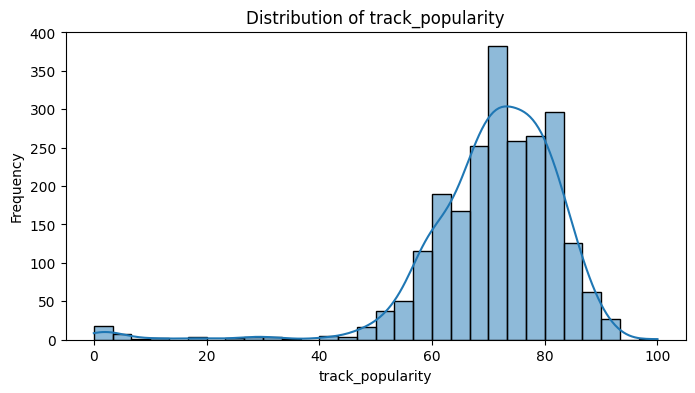

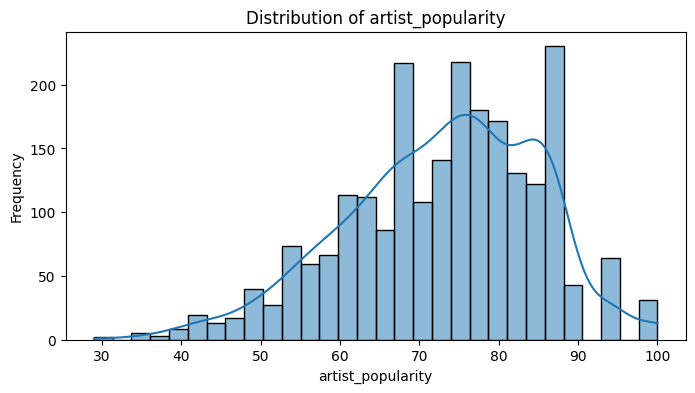

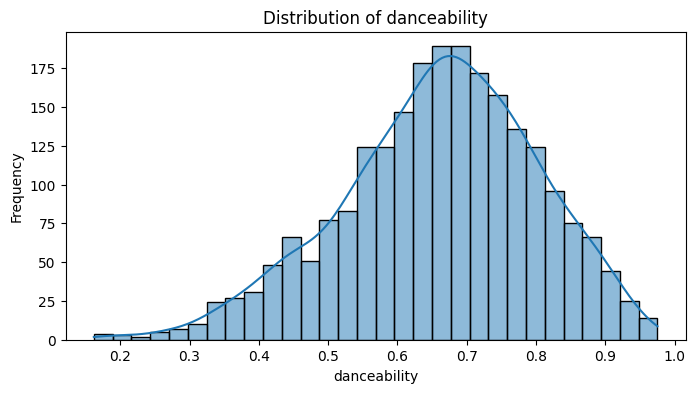

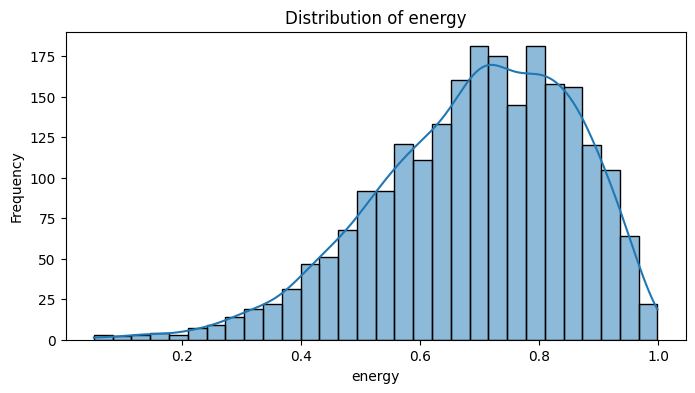

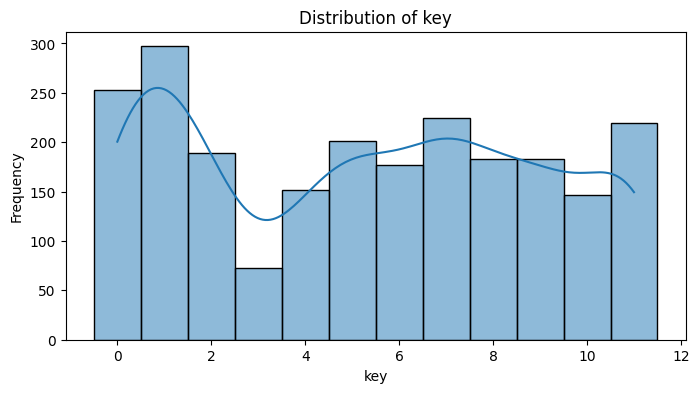

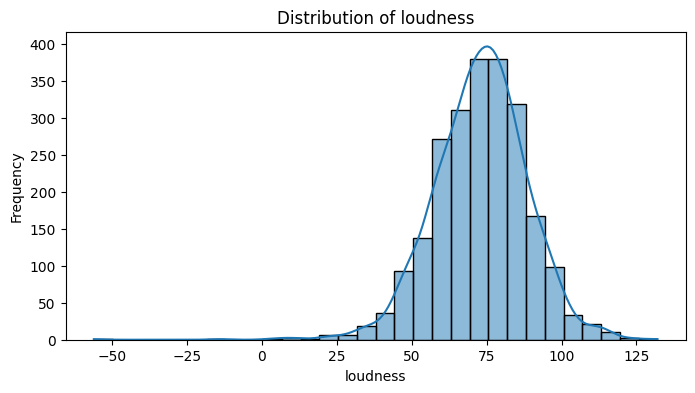

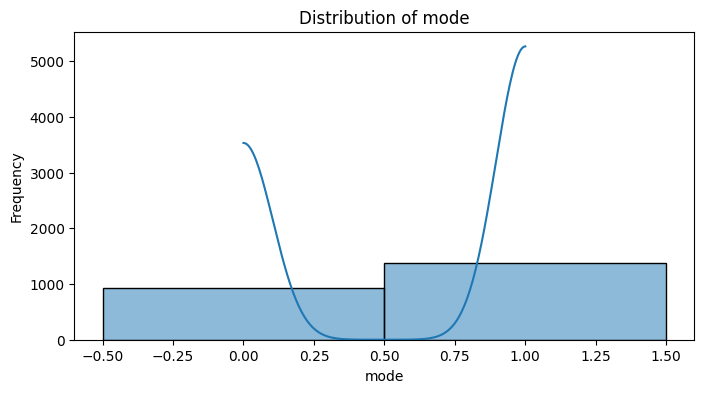

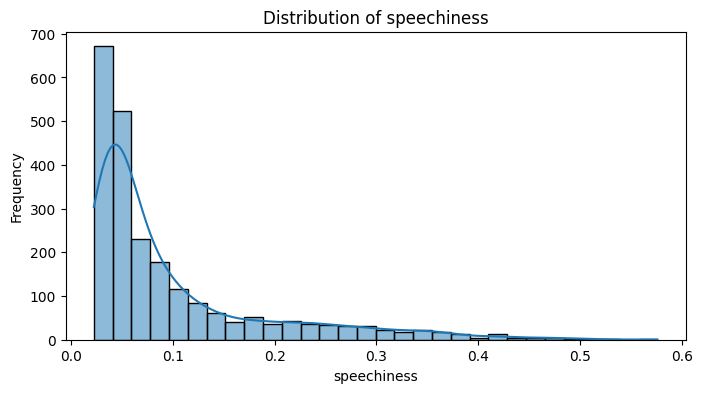

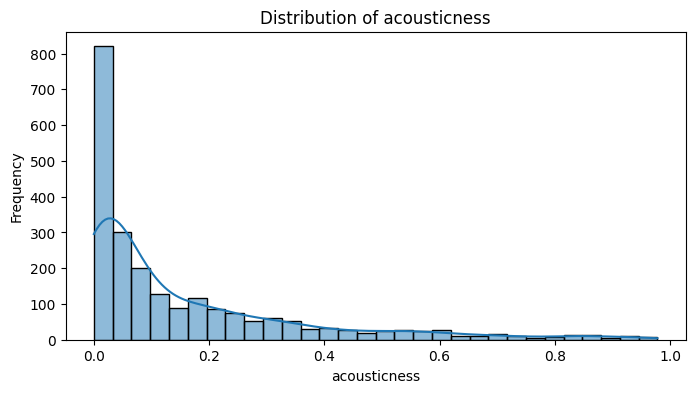

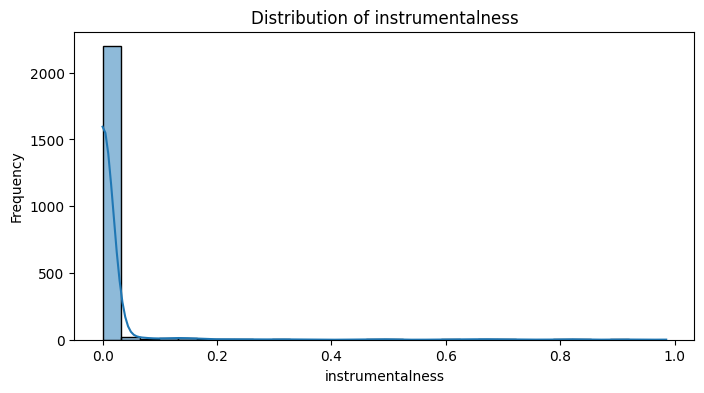

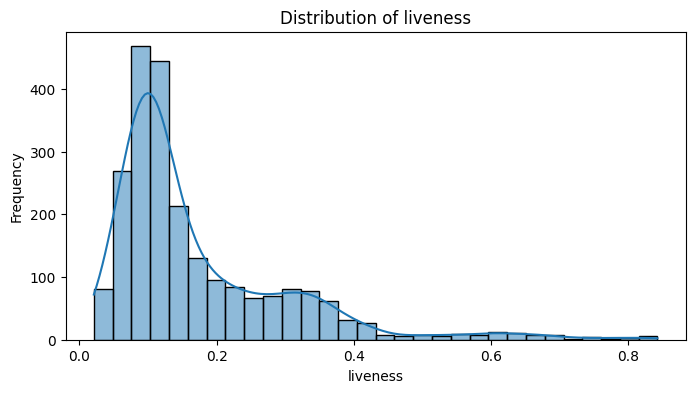

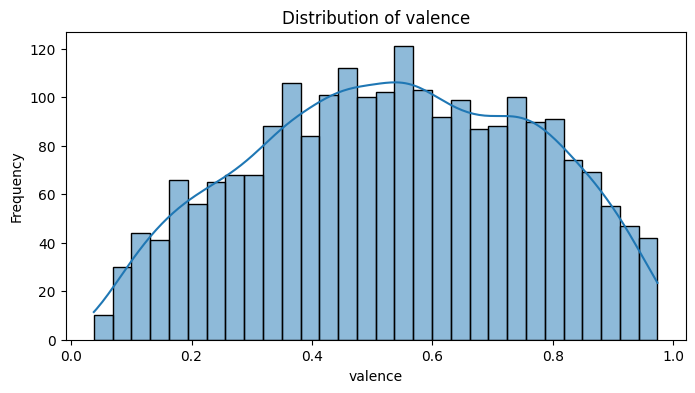

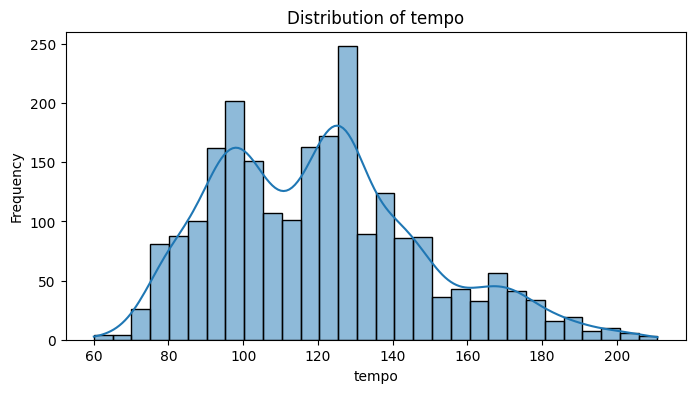

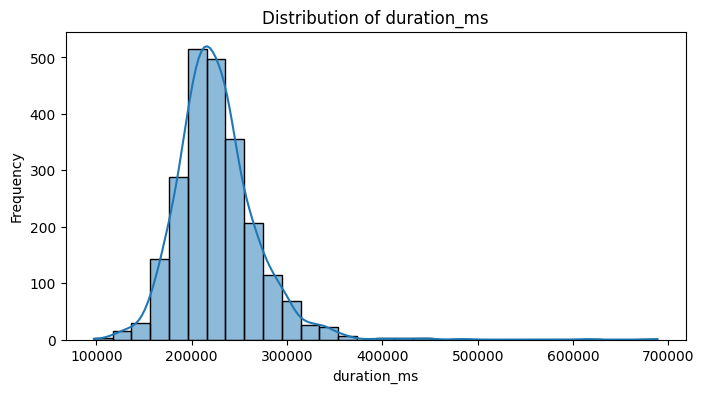

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = [
    'track_popularity', 'artist_popularity', 'danceability', 'energy', 'key', 
    'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
    'liveness', 'valence', 'tempo', 'duration_ms'
]

for col in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True)  # KDE=True adds density curve
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import plotly.graph_objects as go
from scipy.stats import gaussian_kde

columns_to_plot = [
    'track_popularity', 'artist_popularity', 'danceability', 'energy', 'key', 
    'loudness', 'speechiness', 'acousticness', 'instrumentalness', 
    'liveness', 'valence', 'tempo', 'duration_ms'
]

# Loop through each column and plot
for col in columns_to_plot:
    # Compute histogram data
    hist_values, bin_edges = np.histogram(df[col], bins=30)

    # Compute KDE for smooth density line
    kde = gaussian_kde(df[col])
    x_vals = np.linspace(df[col].min(), df[col].max(), 100)

    # Scale KDE to match the histogram's max frequency
    y_vals = kde(x_vals) * len(df[col]) * (bin_edges[1] - bin_edges[0])

    # Create histogram
    fig = px.histogram(df, x=col, nbins=30, opacity=0.6, title=f'Distribution of {col}',
                       labels={col: col}, histnorm=None)

    # Add KDE line scaled to match frequency
    fig.add_trace(go.Scatter(
        x=x_vals, 
        y=y_vals, 
        mode='lines', 
        line=dict(color='red', width=2),
        name='Density Curve'
    ))

    # Show the figure
    fig.show()

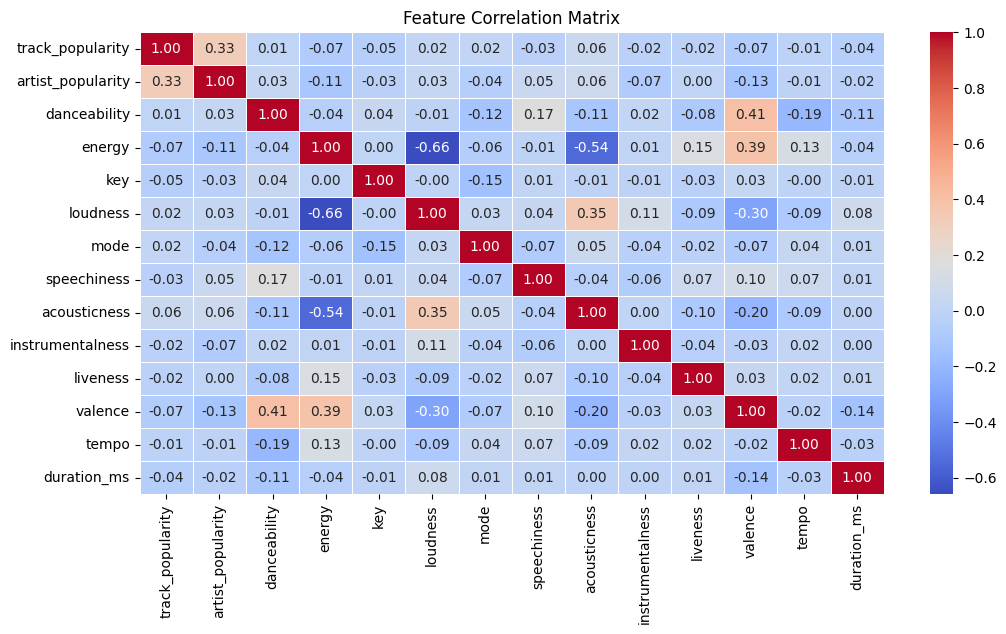

In [37]:
corr_matrix = df[columns_to_plot].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [75]:
# Find highly correlated pairs
correlation_threshold = 0.3
high_corr_pairs = []

for col in corr_matrix.columns:
    for index in corr_matrix.index:
        if col != index and abs(corr_matrix.loc[col, index]) > correlation_threshold:
            high_corr_pairs.append((col, index))

# Print highly correlated features
print(f"Highly Correlated Features {correlation_threshold}:", high_corr_pairs)

Highly Correlated Features 0.3: [('track_popularity', 'artist_popularity'), ('artist_popularity', 'track_popularity'), ('loudness', 'acousticness'), ('acousticness', 'loudness')]


In [109]:
# features = [
#     'track_popularity', 'artist_popularity', 'danceability', 'energy', 'key', 
#     'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
#     'liveness', 'valence', 'tempo', 'duration_ms'
# ]

# dancability / valence
# artist_popularity / track_popularity
# loudness / acousticness

features = [
    'track_popularity', 'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
    'liveness', 'valence', 'tempo', 'duration_ms'
]

corr_matrix = df[features].corr()
correlation_threshold = 0.3
high_corr_pairs = []

for col in corr_matrix.columns:
    for index in corr_matrix.index:
        if col != index and abs(corr_matrix.loc[col, index]) > correlation_threshold:
            high_corr_pairs.append((col, index))

# Print highly correlated features
print(f"Highly Correlated Features {correlation_threshold}:", high_corr_pairs)

Highly Correlated Features 0.3: []


## Segmentation (Groups of Similar Songs)

### Kmeans Brute Force

In [ ]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def find_highly_correlated_features(df_of_features, threshold):
    """
    Uses correlation matrix columns and index to find highly correlated variable pairs and returns
    a list of tuples where the correlated pair only occurs once.
    """
    corr_matrix = df_of_features.corr()
    high_corr_pairs = set()

    for col in corr_matrix.columns:
        for index in corr_matrix.index:
            if col != index and abs(corr_matrix.loc[col, index]) > threshold:
                high_corr_pairs.add(tuple(sorted((col, index))))

    return list(high_corr_pairs)

def generate_feature_combinations(features, high_corr_pairs):
    """
    Generates all valid variable sets ensuring that no correlated pair appears together.
    Also generates variable reduction subsets without testing an exponential number of combinations.
    Returns a list of lists including both generations above.
    """
    feature_sets = []

    if high_corr_pairs:
        for subset in itertools.product(*[[pair[0], pair[1]] for pair in high_corr_pairs]):
            reduced_features = set(features) - set(subset)

            is_valid = all(not (pair[0] in reduced_features and pair[1] in reduced_features) for pair in high_corr_pairs)

            if is_valid and reduced_features not in feature_sets:
                feature_sets.append(reduced_features)
    else:
        # If no correlated variables, just use the full list of variables
        feature_sets.append(set(features))

    # Feature reduction
    final_feature_sets = set()

    for feature_set in feature_sets:
        feature_list = list(feature_set)
        
        for r in range(len(feature_list) - 2, len(feature_list) + 1):  # Test near-complete sets only
            for subset in itertools.combinations(feature_list, r):
                final_feature_sets.add(subset)

    return [list(s) for s in final_feature_sets]

def run_kmeans(df, feature_sets, k_range):
    """
    Runs K-Means clustering for multiple feature sets, recording optimal k and silhouette scores.
    """
    results = []

    # Kmeans
    for features in feature_sets:
        X = df[list(features)]  # Select feature set
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Elbow Method
        inertia = []
        for k in k_range:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans.fit(X_scaled)
            inertia.append(kmeans.inertia_)

        # Optimal K from Elbow
        optimal_k = k_range[np.argmin(np.gradient(inertia))]

        # Silhouette Score
        kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X_scaled)
        silhouette = silhouette_score(X_scaled, labels)

        results.append({
            'features_used': list(features),
            'optimal_k': optimal_k,
            'silhouette_score': silhouette
        })

    return results

# Initial Parameters
correlation_thresholds = [0.3]  # Thresholds for correlation between variables
k_range = range(2, 11)  # Range for number of clusters to test

# Original feature list
features = [
    'track_popularity', 'artist_popularity', 'danceability', 'energy', 'key', 
    'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
    'liveness', 'valence', 'tempo', 'duration_ms'
]  

final_results = []

for threshold in correlation_thresholds:
    print(f"\nðŸ”¹ Running K-Means Optimization for Correlation Threshold: {threshold}")

    # Find highly correlated variables
    high_corr_pairs = find_highly_correlated_features(df[features], threshold)

    # Generate Sets - without corr pairs and variable reduction
    feature_sets = generate_feature_combinations(features, high_corr_pairs)

    # Run K-Means
    results = run_kmeans(df, feature_sets, k_range)

    # Results
    for res in results:
        res['correlation_threshold'] = threshold
        final_results.append(res)

# Results DataFrame
df_results = pd.DataFrame(final_results)
df_results.to_csv('kmeans_results.csv')
display(Markdown(df_results.sort_values(by = ['silhouette_score'], ascending = False).head().to_markdown()))


ðŸ”¹ Running K-Means Optimization for Correlation Threshold: 0.3


|     | features_used                                                                              |   optimal_k |   silhouette_score |   correlation_threshold |
|----:|:-------------------------------------------------------------------------------------------|------------:|-------------------:|------------------------:|
| 349 | ['duration_ms', 'liveness', 'key', 'artist_popularity', 'speechiness', 'instrumentalness'] |           2 |           0.653254 |                     0.3 |
| 261 | ['duration_ms', 'liveness', 'tempo', 'key', 'track_popularity', 'instrumentalness']        |           2 |           0.652141 |                     0.3 |
| 706 | ['duration_ms', 'tempo', 'key', 'artist_popularity', 'speechiness', 'instrumentalness']    |           2 |           0.649544 |                     0.3 |
| 431 | ['duration_ms', 'liveness', 'tempo', 'key', 'artist_popularity', 'instrumentalness']       |           2 |           0.649356 |                     0.3 |
| 260 | ['liveness', 'tempo', 'key', 'artist_popularity', 'speechiness', 'instrumentalness']       |           2 |           0.645629 |                     0.3 |

In [149]:
results_csv = pd.read_csv('kmeans_results.csv')
display(Markdown(results_csv[results_csv['optimal_k'] > 2].sort_values(by=['silhouette_score'], ascending=False).head(3).to_markdown()))

|     |   Unnamed: 0 | features_used                                                                                    |   optimal_k |   silhouette_score |   correlation_threshold |
|----:|-------------:|:-------------------------------------------------------------------------------------------------|------------:|-------------------:|------------------------:|
| 145 |          145 | ['liveness', 'tempo', 'mode', 'speechiness', 'track_popularity', 'instrumentalness']             |           3 |           0.288738 |                     0.3 |
| 508 |          508 | ['duration_ms', 'liveness', 'artist_popularity', 'mode', 'speechiness', 'instrumentalness']      |           3 |           0.274987 |                     0.3 |
| 702 |          702 | ['liveness', 'tempo', 'mode', 'speechiness', 'track_popularity', 'loudness', 'instrumentalness'] |           3 |           0.250953 |                     0.3 |

In [154]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

features = ['liveness', 'tempo', 'mode', 'speechiness', 'track_popularity', 'instrumentalness']

X = df[features]

# Standardize features (Z-score normalization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to find optimal k
inertia = []
K_range = range(2, 11)  # Test k from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Choose optimal k from the elbow method
optimal_k = 3  # Change this based on the elbow method result

# Run K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['audio_cluster'] = kmeans.fit_predict(X_scaled)

from sklearn.metrics import silhouette_score

# Compute Silhouette Score
silhouette = silhouette_score(X_scaled, df['audio_cluster'])
print(f'Silhouette Score for K={optimal_k}: {silhouette:.3f}')

import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

# Reduce dimensions using PCA (to visualize in 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert PCA output to DataFrame
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['audio_cluster']  # Assign cluster labels

# Add feature columns to df_pca for hover data
for col in features:
    df_pca[col] = df[col].values  # Copy feature values from original df

# Create an interactive scatter plot with Plotly
fig = px.scatter(df_pca, 
                 x='PCA1', 
                 y='PCA2', 
                 color=df_pca['Cluster'].astype(str),  # Convert cluster to string for categorical coloring
                 title=f"K-Means Clusters (k={optimal_k}) - PCA Projection",
                 labels={'Cluster': 'Cluster'},
                 color_discrete_sequence=px.colors.qualitative.Set1,  # Use a nice color set
                 hover_data=features,
                 template = 'plotly_dark')  # Now it correctly references features from df_pca

# Show the plot
fig.show()

Silhouette Score for K=3: 0.289


### DBSCAN

EDA / Segmentation (14)

Predictive Model / Model Evaluation (19)

Report (22)

# Backup

In [ ]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def find_highly_correlated_features(df_of_features, threshold):
    """
    Iterates through a correlataion matrix of a dataframe including the specified variables and checks for variables
    that are highly correlated and returns a tuple of both combinations of the variables.
    """
    corr_matrix = df_of_features.corr()
    high_corr_pairs = set()

    for col in corr_matrix.columns:
        for index in corr_matrix.index:
            if col != index and abs(corr_matrix.loc[col, index]) > threshold:
                high_corr_pairs.add(tuple(sorted((col, index))))

    return list(high_corr_pairs)

def generate_feature_combinations(features, high_corr_pairs):
    """
    Generate all valid feature sets ensuring that no correlated pair appears together,
    while also avoiding duplicate sets.
    """
    import itertools

    feature_sets = []

    # Generate combinations by removing one feature from each correlated pair
    for subset in itertools.product(*[[pair[0], pair[1]] for pair in high_corr_pairs]):
        reduced_features = set(features) - set(subset)

        # Ensure that no correlated pairs exist in the feature set
        is_valid = all(not (pair[0] in reduced_features and pair[1] in reduced_features) for pair in high_corr_pairs)

        # Avoid duplicate sets
        if is_valid and reduced_features not in feature_sets:
            feature_sets.append(reduced_features)

    return [list(s) for s in feature_sets]  # Convert sets to lists for consistency


def run_kmeans(df, feature_sets, k_range):
    """
    Run K-Means clustering for multiple feature sets, recording optimal k and silhouette scores.
    """
    results = []

    for features in feature_sets:
        X = df[list(features)]  # Select feature set
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Find optimal k using the Elbow Method
        inertia = []
        for k in k_range:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans.fit(X_scaled)
            inertia.append(kmeans.inertia_)

        # Determine the elbow point (optimal k)
        optimal_k = k_range[np.argmin(np.gradient(inertia))]

        # Compute Silhouette Score for optimal k
        kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X_scaled)
        silhouette = silhouette_score(X_scaled, labels)

        # Save results
        results.append({
            'features_used': list(features),
            'optimal_k': optimal_k,
            'silhouette_score': silhouette
        })

    return results

# ðŸ“Œ Define parameters
correlation_thresholds = [0.3, 0.5, 0.7]  # Test different thresholds
k_range = range(2, 11)  # Range for K-Means
features = [
    'track_popularity', 'artist_popularity', 'danceability', 'energy', 'key', 
    'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
    'liveness', 'valence', 'tempo', 'duration_ms'
]  # Original feature list

# Store all results
final_results = []

# ðŸ“Œ Run the full process for each correlation threshold
for threshold in correlation_thresholds:
    print(f"\nðŸ”¹ Running K-Means Optimization for Correlation Threshold: {threshold}")

    # Find highly correlated feature pairs
    high_corr_pairs = find_highly_correlated_features(df[features], threshold)

    if not high_corr_pairs:
        print(f"No highly correlated features found at threshold {threshold}. Using all features.")
        feature_sets = [set(features)]
    else:
        feature_sets = generate_feature_combinations(features, high_corr_pairs)

    # Run K-Means with these feature sets
    results = run_kmeans(df, feature_sets, k_range)

    # Store results
    for res in results:
        res['correlation_threshold'] = threshold
        final_results.append(res)

# ðŸ“Œ Convert results to DataFrame for documentation
df_results = pd.DataFrame(final_results)

# ðŸ“Œ Display results sorted by best Silhouette Score
df_results = df_results.sort_values(by='silhouette_score', ascending=False)
display(Markdown(df_results.to_markdown()))